In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
from collections import defaultdict

In [2]:
# construct networkx graph,
mpg_path = "../microrca_experiments/experiments/sock-shop/v3-t4/rca/front-end/mpg.csv"
mpg_path = "./data/sock-shop/mpg.csv"
digraph = nx.DiGraph()

with open(mpg_path, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for line in reader:
        if "db" in line[2] or "db" in line[1]:
            continue
        if "rabbitmq" in line[2] or "rabbitmq" in line[1]:
            continue
        if "queue" in line[2] or "queue" in line[1]:
            continue
        if "node" in line[2] or "node" in line[1]:
            continue
        digraph.add_edge(line[2], line[1])

digraph = digraph.reverse()

In [3]:
# calculate pagerank
pagerank = nx.pagerank(digraph)
pprint(pagerank)

{'carts': 0.16554648763821395,
 'catalogue': 0.1365331088933683,
 'front-end': 0.11260468314904803,
 'orders': 0.1365331088933683,
 'payment': 0.14161806189389364,
 'shipping': 0.14161806189389364,
 'user': 0.16554648763821395}


In [4]:
# create results dict
results_path = "./data/sock-shop/results.csv"
results_dict = {}
with open(results_path, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for line in reader:
        results_dict[line[0]] = line[1]
pprint(results_dict)

{'carts': '1',
 'catalogue': '2',
 'front-end': '-1',
 'orders': '2',
 'payment': '1',
 'shipping': '2',
 'user': '1'}


In [5]:
# calculate service-level characteristics
nodes_attr = dict()
for node in digraph.nodes():
    node_attr = {
        "inward edge": len(digraph.in_edges(node)),
        "outward edge": len(digraph.out_edges(node)),
        "pagerank": pagerank[node],
        "rca rank": results_dict[node], 
        }
    nodes_attr[node] = node_attr
    
pprint(nodes_attr)

{'carts': {'inward edge': 2,
           'outward edge': 0,
           'pagerank': 0.16554648763821395,
           'rca rank': '1'},
 'catalogue': {'inward edge': 1,
               'outward edge': 0,
               'pagerank': 0.1365331088933683,
               'rca rank': '2'},
 'front-end': {'inward edge': 0,
               'outward edge': 4,
               'pagerank': 0.11260468314904803,
               'rca rank': '-1'},
 'orders': {'inward edge': 1,
            'outward edge': 4,
            'pagerank': 0.1365331088933683,
            'rca rank': '2'},
 'payment': {'inward edge': 1,
             'outward edge': 0,
             'pagerank': 0.14161806189389364,
             'rca rank': '1'},
 'shipping': {'inward edge': 1,
              'outward edge': 0,
              'pagerank': 0.14161806189389364,
              'rca rank': '2'},
 'user': {'inward edge': 2,
          'outward edge': 0,
          'pagerank': 0.16554648763821395,
          'rca rank': '1'}}


In [26]:
# conver to df
df = pd.DataFrame()
df_dict = defaultdict(list)
for node, attr in nodes_attr.items():
    df_dict["service"].append(node)
    df_dict["inward edges"].append(attr["inward edge"])
    df_dict["outward edges"].append(attr["outward edge"])
    df_dict["pagerank"].append(attr["pagerank"])
    df_dict["rca rank"].append(attr["rca rank"])

df = pd.DataFrame.from_dict(df_dict)
df.to_csv("./sock-shop_char.csv", index=False)
pprint(df)

     service  inward edges  outward edges  pagerank rca rank
0       user             2              0  0.165546        1
1     orders             1              4  0.136533        2
2      carts             2              0  0.165546        1
3  front-end             0              4  0.112605       -1
4  catalogue             1              0  0.136533        2
5    payment             1              0  0.141618        1
6   shipping             1              0  0.141618        2


In [7]:
# set node color list
node_colors = []
for node, attr in nodes_attr.items():
    if attr["rca rank"] == "-1":
        node_colors.append("#B33A3A")
    elif attr["rca rank"] == "1":
        node_colors.append("#AFE1AF")
    else:
        node_colors.append("#EED202")

        

/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_96595/3419270322.py:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = node_colors)


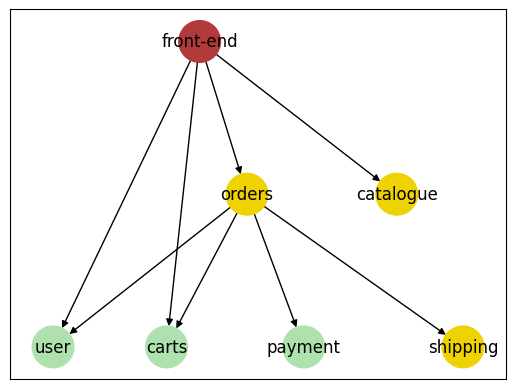

In [8]:
# draw network graph
nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = node_colors)
plt.show()


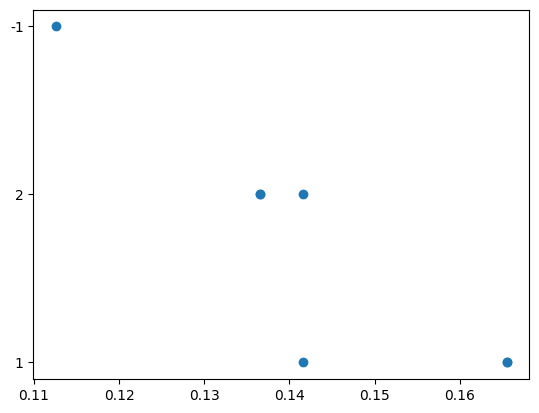

In [9]:
plt.scatter(df["pagerank"], df["rca rank"])
plt.show()

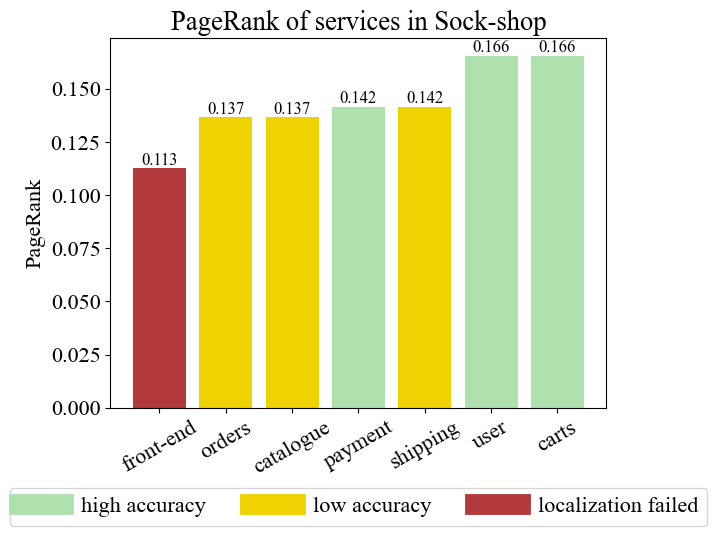

/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_96595/1221030831.py:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = node_colors)


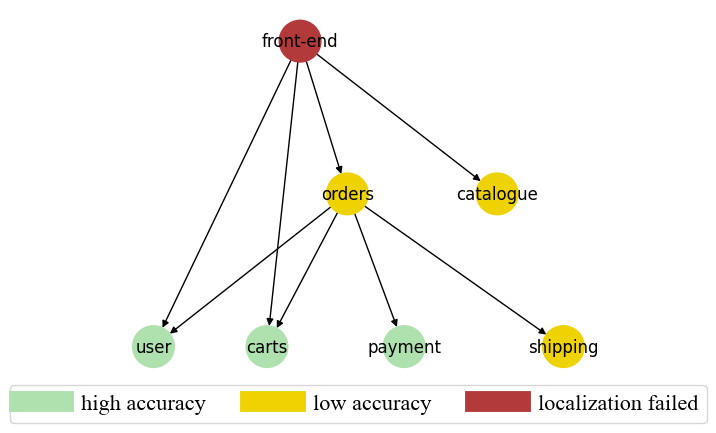

In [24]:
la_color = "#EED202"
n_color = "#AFE1AF"
lf_color = "#B33A3A"
linewidth = 15
fontsize = 16    
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = fontsize

sorted_df = df.sort_values(by=["pagerank"])
bar_colors = list(map(lambda x: lf_color if x == "-1" else (n_color if x == "1" else la_color) ,sorted_df["rca rank"]))

bar = plt.bar(sorted_df["service"], sorted_df["pagerank"], color=bar_colors)
plt.bar_label(bar, fmt='%.3f', fontsize=12)

plt.title("PageRank of services in Sock-shop")
plt.ylabel("PageRank")

plt.xticks(rotation=30)
label_n, = plt.plot([], [],color=n_color, label='high accuracy', linestyle='-', linewidth=linewidth)
label_la, = plt.plot([], [],color=la_color, label='low accuracy', linestyle='-', linewidth=linewidth)
label_lf, = plt.plot([], [],color=lf_color, label='localization failed', linestyle='-', linewidth=linewidth)
plt.legend(handles=[label_n, label_la, label_lf],loc='lower center', ncols=3,bbox_to_anchor=(0.5, -0.35))

plt.savefig("./5_5-sock-shop_pr.png", bbox_inches="tight")
plt.show()


label_n, = plt.plot([], [],color=n_color, label='high accuracy', linestyle='-', linewidth=linewidth)
label_la, = plt.plot([], [],color=la_color, label='low accuracy', linestyle='-', linewidth=linewidth)
label_lf, = plt.plot([], [],color=lf_color, label='localization failed', linestyle='-', linewidth=linewidth)
plt.legend(handles=[label_n, label_la, label_lf],loc='lower center', ncols=3,bbox_to_anchor=(0.5, -0.15))
nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = node_colors)
plt.axis("off")
plt.savefig("./5_4-sock-shop_graph.png", bbox_inches="tight")
plt.show()

/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_96595/3783855791.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = "orange")


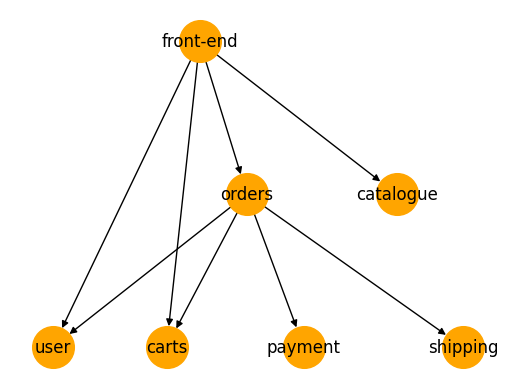

In [25]:
nx.draw_networkx(digraph, pos=nx.nx_pydot.graphviz_layout(digraph, prog='dot'), node_size=900, node_color = "orange")
plt.axis("off")
plt.savefig("./4_4-sock-shop_graph.png", bbox_inches="tight")